In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_raw = pd.read_excel('Dane_magisterka.xlsx')

mapping_dict = {
    'Wiek': {'14 - 17 lat': 'nastolatek', 
             '18 - 25 lat': 'dorosły',
             '26 - 35 lat': 'starszy'},
    'internet dziennie': {'3-4 godziny': 'średnio', 
                          '5-6 godzin': 'dużo'},
    'wersja': {'WIT PWR': 'PWr', 
               'V0 A': 'A', 
               'V0 B': 'B'}
}

df_clean = (
    df_raw.drop(columns=[
        'Płeć',
        'Czy jesteś/byłeś studentem Politechniki Wrocławskiej?   ',
        'Jeśli tak, którego wydziału? ',
        'ID',
        ])
    .rename(columns={
        'Jak często korzystasz ze stron internetowych uczelni wyższych?': 'znajomość stron PWr',
        'Jak oceniasz swoją biegłość w korzystaniu z internetu? ' : 'biegłość internetowa',
        '  Ile godzin dziennie spędzasz w internecie?  ' : 'internet dziennie',
        'Czy masz doświadczenie w projektowaniu stron internetowych?   ': 'projektuje strony',
        'średni czas fiksacji (s)' : 'średni czas fiksacji',
        'najdłuższa fiksacja (s)' : 'najdłuższa fiksacja',
        'łączny czas badania (min)' : 'czas badania'
    })
    .apply(lambda col: col.map(mapping_dict[col.name]) if col.name in mapping_dict else col)
)

df_clean['czas badania'] = [np.round(float(czas[:2]) + float(czas[3:5])/60,2) for czas in df_clean['czas badania']]
df_clean

TypeError: 'float' object is not subscriptable

In [ ]:
# df_num = pd.get_dummies(df_clean, columns=['wersja'], drop_first=False, dtype=int).drop(columns='wersja_B')

# mapping_dict = {
#     'Wiek': {'nastolatek': 7, 
#              'dorosły': 9,
#              'starszy': 13},
#     'internet dziennie': {'średnio': 3, 
#                           'dużo':5},
#     'projektuje strony': {'Tak': 1,
#                           'Nie': 0},
#     'Wykształcenie': {'Wyższe':3,
#                       'Podstawowe':1},
#     'znajomość stron PWr': {'Kilka razy w tygodniu': 3,
#                             'Kilka razy w miesiącu': 2,
#                             'Rzadziej': 1,
#                             'Wcale': 0}
# }

# df_num = df_num.apply(lambda col: col.map(mapping_dict[col.name]) if col.name in mapping_dict else col)
# df_num

In [ ]:
#testowe
# Kodyfikacja wersji i utworzenie kolumn dummy
df_dummies = pd.get_dummies(df_clean, columns=['wersja'], drop_first=False, dtype=int)

# Scalanie wersji A i B do jednej kolumny wersja_AB
df_dummies['wersja_AB'] = df_dummies[['wersja_A', 'wersja_B']].sum(axis=1)

# Usuwanie osobnych kolumn wersji A i B
df_num = df_dummies.drop(columns=['wersja_A', 'wersja_B'])

# Mapowanie wartości liczbowych
mapping_dict = {
    'Wiek': {'nastolatek': 7, 
             'dorosły': 9,
             'starszy': 13},
    'internet dziennie': {'średnio': 3, 
                          'dużo':5},
    'projektuje strony': {'Tak': 1,
                          'Nie': 0},
    'Wykształcenie': {'Wyższe':3,
                      'Podstawowe':1},
    'znajomość stron PWr': {'Kilka razy w tygodniu': 3,
                            'Kilka razy w miesiącu': 2,
                            'Rzadziej': 1,
                            'Wcale': 0}
}

df_num = df_num.apply(lambda col: col.map(mapping_dict[col.name]) if col.name in mapping_dict else col)


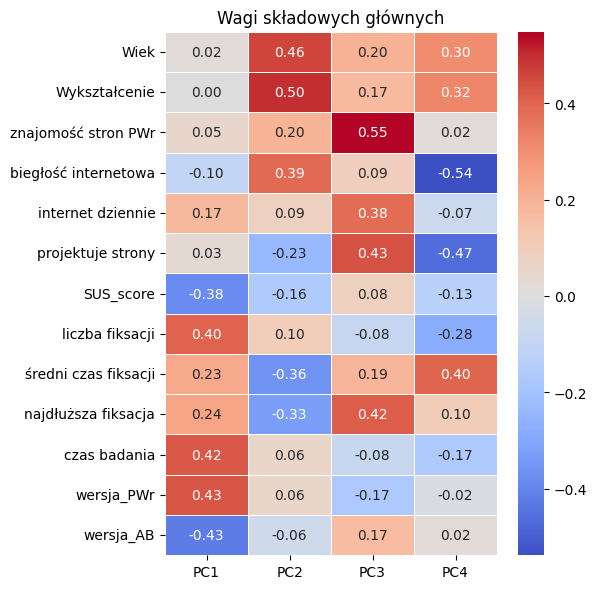

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# pca = PCA(n_components=4)  
pca = PCA()  
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_num.columns
)

plt.figure(figsize=(6, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Wagi składowych głównych')
plt.tight_layout()

plt.savefig('PCA_z_cechami_kategorialnymi.png')
plt.show()

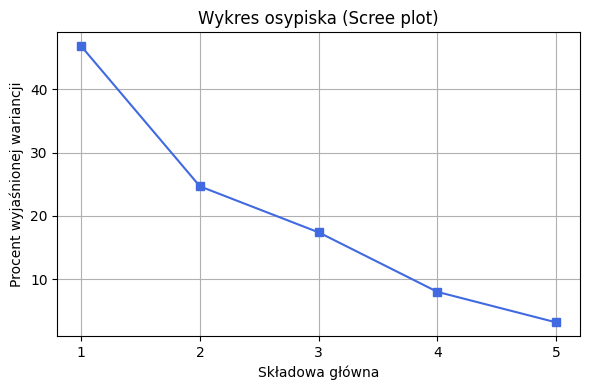

In [8]:
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
# plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.plot(range(1, len(explained_var) + 1), explained_var * 100, marker='s', linestyle='-', color='royalblue')
plt.xlabel('Składowa główna')
plt.ylabel('Procent wyjaśnionej wariancji')
plt.title('Wykres osypiska (Scree plot)')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()



In [9]:
for i, var in enumerate(explained_var, start=1):
    print(f"Składowa {i}: {var * 100:.2f}%")

Składowa 1: 46.81%
Składowa 2: 24.66%
Składowa 3: 17.39%
Składowa 4: 7.98%
Składowa 5: 3.17%
